Arima

In [26]:
#!pip install pmdarima
!pip install libpython
!pip install m2w64-toolchain
!pip install pystan
#!pip install fbprophet

ERROR: Could not find a version that satisfies the requirement m2w64-toolchain
ERROR: No matching distribution found for m2w64-toolchain


In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the dataset
df = pd.read_csv('datasets/datasets_56102_107707_monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.shape

(476, 2)

In [5]:
df.tail (15)

,Month,Monthly beer production
461,1994-06,125.0
462,1994-07,127.0
463,1994-08,143.0
464,1994-09,143.0
465,1994-10,160.0
466,1994-11,190.0
467,1994-12,182.0
468,1995-01,138.0
469,1995-02,136.0
470,1995-03,152.0


In [6]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [7]:
df.rename(columns={'Monthly beer production': 'Monthly_Prod'}, inplace=True)

In [8]:
df.head()

,Monthly_Prod
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


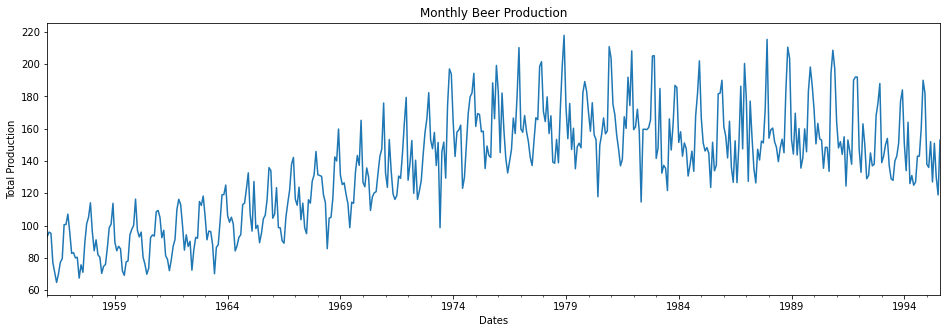

In [9]:
#Basic Data Plot
df.index.freq = 'MS' #month start
ax = df['Monthly_Prod'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');


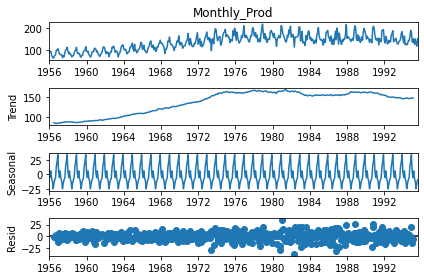

In [10]:
#Seasonal Decompose Plots
a = seasonal_decompose(df["Monthly_Prod"], model = "add")
a.plot();


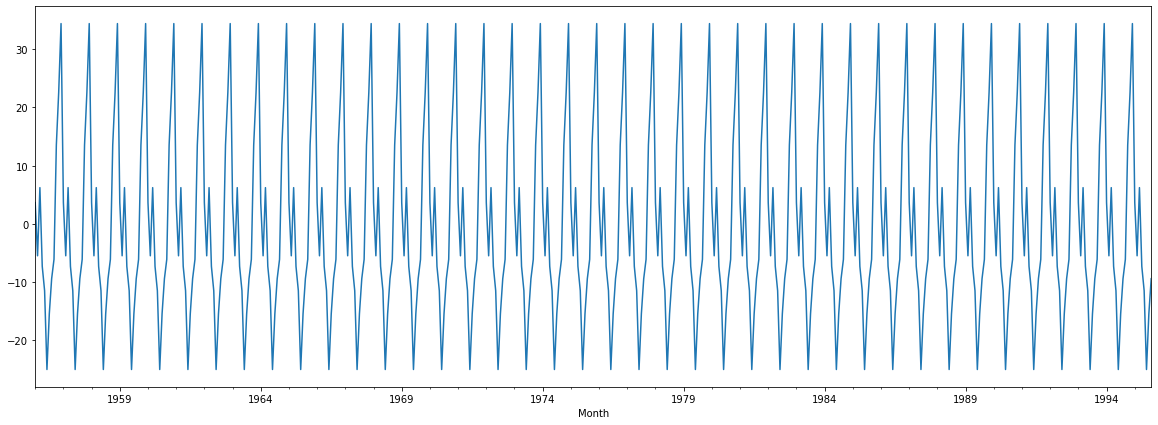

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
a.seasonal.plot();


The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

---


d: The number of times that the raw observations are differenced, also called the degree of differencing.

---


q: The size of the moving average window, also called the order of moving average.


In [12]:
#ARIMA Forecast
#Finding the best values for p,q,d,P,Q,D

auto_arima(df['Monthly_Prod'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(3, 0, [1], 12)   Log Likelihood               -1738.349
Date:                              Thu, 25 Feb 2021   AIC                           3498.697
Time:                                      19:19:53   BIC                           3544.494
Sample:                                           0   HQIC                          3516.707
                                              - 476                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.019      0.073      0.942      -0.035       0.038
ar.L1         -1.1476      0.005   -217.153      0.000      -1.158      -1.137
ar.L2         -0.9907      0.006   -178.680      0.000      -1.002      -0.980
ma.L1          0.2190      0.024      9.053      0.000       0.172       0.266
ma.L2         -0.0085      0.024     -0.358      0.721      -0.055       0.038
ma.L3         -0.8621      0.023    -38.280      0.000      -0.906      -0.818
ar.S.L12       0.9678      0.084     11.539      0.000       0.803       1.132
ar.S.L24       0.0054      0.053      0.102      0.918      -0.098       0.109
ar.S.L36       0.0180      0.063      0.284      0.776      -0.106       0.142
ma.S.L12      -0.7594      0.072    -10.593      0.000      -0.900      -0.619
sigma2        80.5420      4.302     18.721      0.000      72.110      88.974
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                36.80
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.29   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Train-Test split

train_data = df[:len(df)-12] 
test_data = df[len(df)-12:] #last 12 months
arima_model = SARIMAX(train_data['Monthly_Prod'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                               Monthly_Prod   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.825
Date:                                    Thu, 25 Feb 2021   AIC                           3437.649
Time:                                            19:20:08   BIC                           3483.164
Sample:                                        01-01-1956   HQIC                          3455.567
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1188      0.042     -2.804      0.005      -0.202      -0.036
ar.L2         -0.1658      0.045     -3.663      0.000      -0.255      -0.077
ma.L1         -0.8508      0.027    -31.582      0.000      -0.904      -0.798
ar.S.L12       1.7534      0.086     20.281      0.000       1.584       1.923
ar.S.L24      -1.6127      0.150    -10.723      0.000      -1.908      -1.318
ar.S.L36       0.7875      0.103      7.642      0.000       0.586       0.990
ar.S.L48       0.0706      0.034      2.054      0.040       0.003       0.138
ma.S.L12      -1.5566      0.108    -14.414      0.000      -1.768      -1.345
ma.S.L24       1.4054      0.170      8.282      0.000       1.073       1.738
ma.S.L36      -0.6667      0.096     -6.937      0.000      -0.855      -0.478
sigma2        85.2006      5.087     16.750      0.000      75.231      95.170
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                42.51
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.10   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
#Prediction
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions") #last 12 months
arima_pred

1994-09-01    133.793800
1994-10-01    157.892689
1994-11-01    182.376840
1994-12-01    183.572739
1995-01-01    144.496131
1995-02-01    136.762303
1995-03-01    151.057402
1995-04-01    133.134529
1995-05-01    138.138287
1995-06-01    120.482075
1995-07-01    128.323763
1995-08-01    138.824962
Freq: MS, Name: ARIMA Predictions, dtype: float64

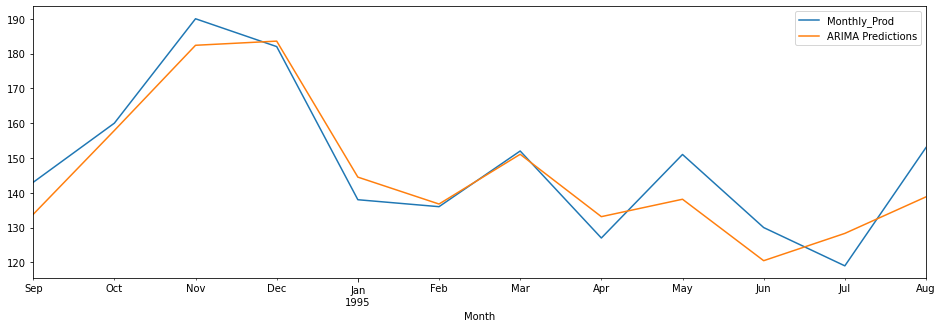

In [15]:
test_data['Monthly_Prod'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [16]:
#Model Evaluation
arima_rmse_error = rmse(test_data['Monthly_Prod'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 64.58012587040504
RMSE Error: 8.036176072635856
Mean: 136.3953781512605


In [17]:
test_data['ARIMA_Predictions'] = arima_pred

Prophet

In [18]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [19]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

ModuleNotFoundError: No module named 'fbprophet'

In [51]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1994-09-01,144.980217
1994-10-01,166.012222
1994-11-01,173.629620
1994-12-01,185.881744
1995-01-01,155.163406
1995-02-01,146.732442
1995-03-01,158.844417
1995-04-01,143.086155
1995-05-01,139.585118


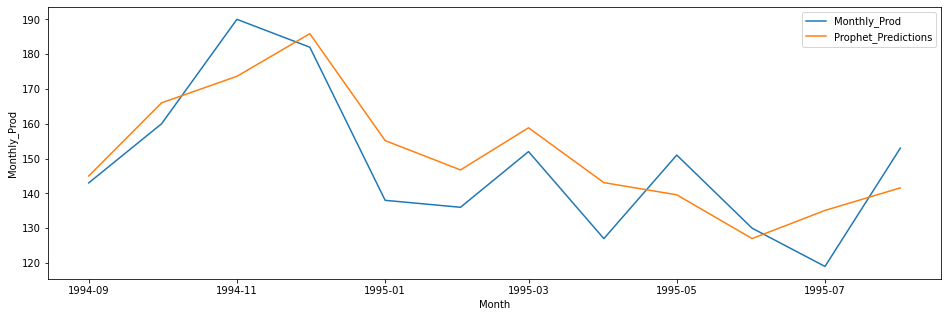

In [55]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index,label='Monthly_Prod', y=test_data["Monthly_Prod"])
sns.lineplot(x=test_data.index, label='Prophet_Predictions', y = test_data["Prophet_Predictions"]);

In [57]:
prophet_rmse_error = rmse(test_data['Monthly_Prod'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 130.62088996007174
RMSE Error: 11.428949643780557
Mean: 136.39537815126045


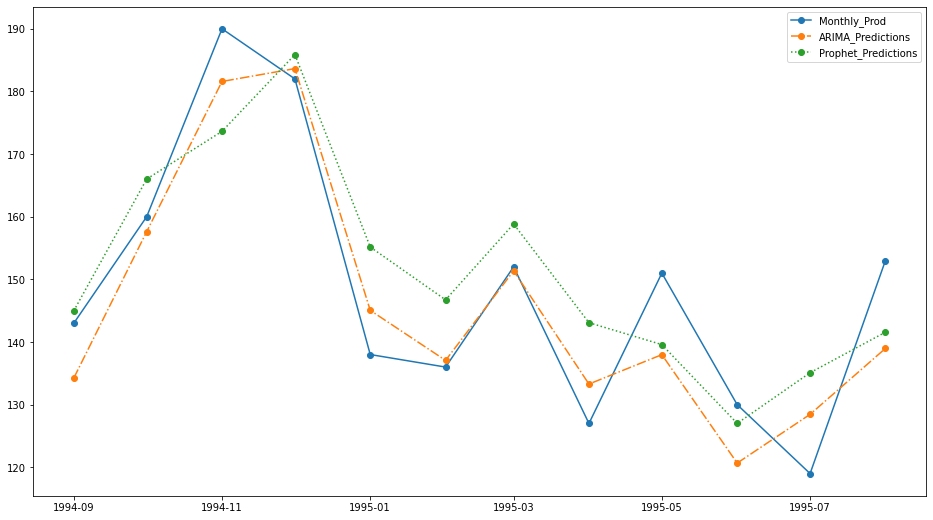

In [63]:
#Comparison

rmse_errors = [arima_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, label='Monthly_Prod', y=test_data["Monthly_Prod"], linestyle="-")
plt.plot_date(test_data.index, label='ARIMA_Predictions', y=test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, label='Prophet_Predictions', y=test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [64]:
print(f"Mean: {test_data['Monthly_Prod'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.109168,65.758604
1,Prophet,11.428950,130.620890


In [65]:
#Final Prediction data
test_data

,Monthly_Prod,ARIMA_Predictions,Prophet_Predictions
Month,,,
1994-09-01,143.0,134.241516,144.980217
1994-10-01,160.0,157.620190,166.012222
1994-11-01,190.0,181.593237,173.629620
1994-12-01,182.0,183.646905,185.881744
1995-01-01,138.0,145.052873,155.163406
1995-02-01,136.0,137.066758,146.732442
1995-03-01,152.0,151.360742,158.844417
1995-04-01,127.0,133.289272,143.086155
1995-05-01,151.0,137.980286,139.585118
